In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#  Model-1(DV - Pclass , IDV - Remaining)

In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
le = preprocessing.LabelEncoder()

In [10]:
le.fit(dataset["Sex"])

LabelEncoder()

In [11]:
dataset["Sex"] = le.transform(dataset["Sex"])

In [12]:
le.fit(dataset["Pclass"])
le.fit(dataset["SibSp"])

LabelEncoder()

In [13]:
dataset["Age"].mean()

29.69911764705882

In [14]:
import numpy as np

In [15]:
new_age_var = np.where(dataset["Age"].isnull(),29,dataset["Age"])

In [16]:
dataset["Age"] = new_age_var

In [17]:
dataset= pd.get_dummies(data = dataset, dummy_na=True, prefix= ["Embarked"],columns=["Embarked"])

In [18]:
y = dataset["Pclass"]

In [19]:
X = dataset.drop(["Ticket","Pclass","PassengerId","Name","Cabin","Embarked_nan"],axis = 1)

In [20]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0


In [21]:
y.count()

891

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state=0)

In [23]:
X_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
857,1,1,51.0,0,0,26.5500,0,0,1
52,1,0,49.0,1,0,76.7292,1,0,0
386,0,1,1.0,5,2,46.9000,0,0,1
124,0,1,54.0,0,1,77.2875,0,0,1
578,0,0,29.0,1,0,14.4583,1,0,0


In [24]:
from sklearn.naive_bayes import *

In [25]:
clf = BernoulliNB()

In [26]:
X.isnull().sum()

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [27]:
X.head(1)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.25,0,0,1


In [28]:
y_pred = clf.fit(X_train,y_train).predict(X_test)

In [29]:
accuracy_score(y_test,y_pred,normalize = True)

0.6268656716417911

In [30]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[ 25,  12,  23],
       [  4,  21,  27],
       [ 16,  18, 122]], dtype=int64)

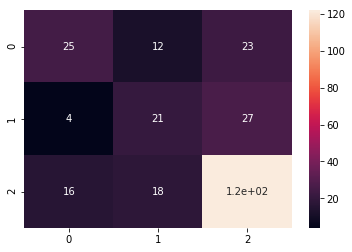

In [31]:
sns.heatmap(confusion, annot = True)

#  Model-2(DV - Gender , IDV - Remaining)

In [32]:
y = dataset["Sex"]

In [33]:
x = dataset.drop(["Ticket","Sex","PassengerId","Name","Cabin","Embarked_nan"],axis = 1)

In [34]:
x.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state=0)

In [36]:
y_pred = clf.fit(X_train,y_train).predict(X_test)

In [37]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[ 99,   0],
       [  0, 169]], dtype=int64)

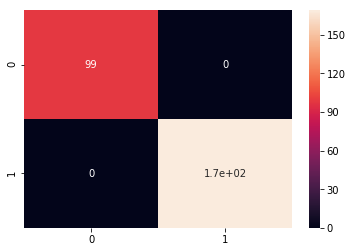

In [38]:
sns.heatmap(confusion, annot = True)

In [39]:
accuracy_score(y_test,y_pred)

1.0

 # Model-3(DV - Sibsp , IDV - Remaining)

In [40]:
y = dataset["SibSp"]

In [41]:
x = dataset.drop(["Ticket","SibSp","PassengerId","Name","Cabin","Embarked_nan"],axis = 1)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state=0)

In [43]:
X_train.shape

(623, 9)

In [44]:
y_pred = clf.fit(X_train,y_train).predict(X_test)

In [45]:
accuracy_score(y_test,y_pred)

0.9216417910447762

In [46]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[181,   0,   0,   0,   0,   0],
       [  0,  65,   0,   0,   0,   0],
       [  0,   7,   0,   0,   0,   0],
       [  0,   6,   0,   0,   0,   0],
       [  0,   6,   0,   0,   1,   0],
       [  0,   2,   0,   0,   0,   0]], dtype=int64)

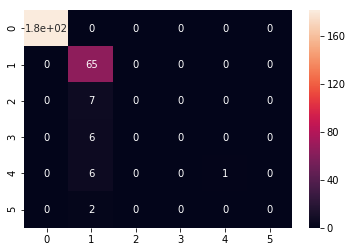

In [47]:
sns.heatmap(confusion, annot = True)

#  Model-4(DV - Parch , IDV - Remaining)

In [48]:
y = dataset["Parch"]

In [49]:
x = dataset.drop(["Ticket","Parch","PassengerId","Name","Cabin","Embarked_nan"],axis = 1)

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state=0)

In [51]:
y_pred = clf.fit(X_train,y_train).predict(X_test)

In [52]:
accuracy_score(y_test,y_pred)

0.914179104477612

In [53]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[204,   0,   0,   0,   0],
       [  0,  37,   3,   0,   0],
       [  0,  17,   4,   0,   0],
       [  0,   0,   2,   0,   0],
       [  0,   0,   1,   0,   0]], dtype=int64)

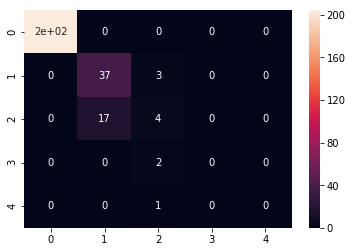

In [54]:
sns.heatmap(confusion , annot = True)

# Model-5(DV -Embarked , IDV - Remaining)

In [55]:
dataset = pd.read_csv("train.csv")

In [56]:
freq_port = dataset.Embarked.dropna().mode()[0]
freq_port

'S'

In [57]:
combine = [dataset]

In [58]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [60]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [61]:
dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,0


In [62]:
y = dataset["Embarked"]

In [63]:
x = dataset.drop(["Ticket","Embarked","PassengerId","Name","Cabin"],axis = 1)

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state=0)

In [65]:
new_age_var = np.where(dataset["Age"].isnull(),29,dataset["Age"])
dataset["Age"] = new_age_var

In [66]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0
